In [177]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(15,15)

tcms = pd.read_csv('tcms_total.csv')

In [178]:
tcms["ganador"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón"]), 1, 0)

In [399]:
tcms["finalista"] = np.where(tcms.artista.isin(["Angy", "Roko", "Edurne", "Ruth Lorenzo", "Blas Cantó", "Miquel Fernández", "María Villalón", "Santiago Segura I", "Julio Iglesias, Jr", "Daniel Diges", "Arturo Valls", "Melody", "Xuso Jones", "Edu Soto", "Pablo Puyol", "Rosa López", "Lorena Gómez", "Lucía Gil", "Fran Dieli", "Carlos Baute", "Soraya Arnelas"]), 1, 0)

In [179]:
tcms.loc[(tcms.artista == 'Santiago Segura') & (tcms.temporada == 1), 'artista'] = 'Santiago Segura I'

In [180]:
tcms.loc[(tcms.artista == 'Santiago Segura') & (tcms.temporada == 2), 'artista'] = 'Santiago Segura II'

In [181]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso

In [402]:
df1 = tcms[tcms.programa < 5][['temporada', 'artista', 'sexo', 'edad', 'categoria', 'ganador', 'finalista', 'programa', 'cancion', 'j1','j2','j3','j4','publico']].melt(id_vars=['temporada', 'artista', 'sexo', 'edad', 'categoria','ganador', 'finalista', 'cancion', 'programa'], value_vars=['j1','j2','j3','j4','publico'], var_name='jurado', value_name='puntuacion')

In [403]:
df1.head()

,temporada,artista,sexo,edad,categoria,ganador,finalista,cancion,programa,jurado,puntuacion
0,1,Angy,F,21,Cantante,1,1,"Born This Way, de Lady Gaga",1,j1,12
1,1,Angy,F,21,Cantante,1,1,"Me gustas mucho, de Rocío Dúrcal",2,j1,10
2,1,Angy,F,21,Cantante,1,1,Only Girl (In the World) de Rihanna,3,j1,9
3,1,Angy,F,21,Cantante,1,1,Girls Just Want to Have Fun de Cyndi Lauper,4,j1,12
4,1,Toñi Salazar,F,48,Cantante,0,0,"Pena, penita, pena, de Lola Flores",1,j1,10


In [404]:
df1.groupby('artista').mean().reset_index().sort_values('ganador')

,artista,temporada,edad,ganador,finalista,programa,puntuacion
0,Adrián Rodríguez,4.0,31.0,0.0,0.0,2.5,9.15
35,"Julio Iglesias, Jr.",1.0,38.0,0.0,0.0,2.5,6.00
36,La Terremoto de Alcorcón,6.0,47.0,0.0,0.0,2.5,5.85
37,Llum Barrera,3.0,45.0,0.0,0.0,2.5,7.75
38,Lorena Gómez,5.0,30.0,0.0,1.0,2.5,9.00
...,...,...,...,...,...,...,...
45,María Villalón,7.0,29.0,1.0,1.0,2.5,8.30
3,Angy,1.0,21.0,1.0,1.0,2.5,7.45
19,Edurne,3.0,28.0,1.0,1.0,2.5,7.70
57,Ruth Lorenzo,4.0,37.0,1.0,1.0,2.5,9.45


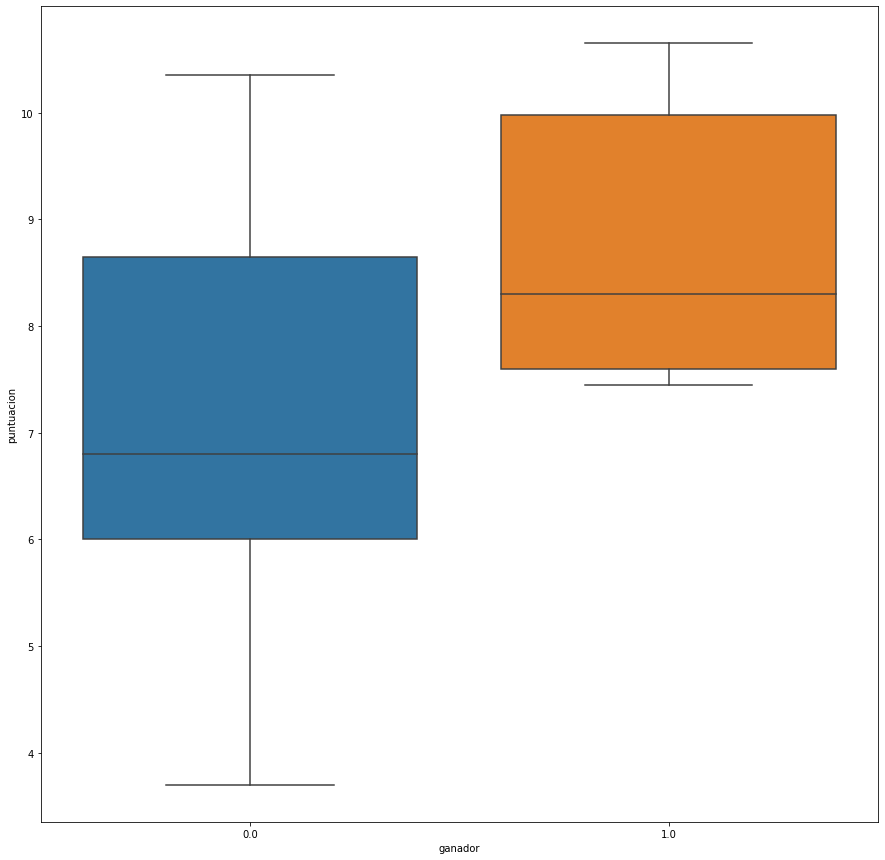

In [405]:
sns.boxplot(data=df1.groupby('artista').mean().reset_index(), x='ganador', y='puntuacion')

In [406]:
data = df1.pivot_table(index=['artista', 'temporada', 'sexo', 'edad', 'categoria', 'finalista', 'ganador'], values='puntuacion', columns='programa', aggfunc='sum', fill_value=0).reset_index()

In [407]:
data.head()

programa,artista,temporada,sexo,edad,categoria,finalista,ganador,1,2,3,4
0,Adrián Rodríguez,4,M,31,Cantante,0,0,43,46,53,41
1,Ana Morgade,4,F,40,Humorista,0,0,27,32,33,38
2,Anabel Alonso,7,F,53,Humorista,0,0,25,30,22,34
3,Angy,1,F,21,Cantante,1,1,46,32,30,41
4,Anna Simon,2,F,30,TV,0,0,35,20,32,48


In [408]:
data.drop(['ganador', 'temporada'], axis=1).select_dtypes('number')

programa,edad,finalista,1,2,3,4
0,31,0,43,46,53,41
1,40,0,27,32,33,38
2,53,0,25,30,22,34
3,21,1,46,32,30,41
4,30,0,35,20,32,48
...,...,...,...,...,...,...
65,57,0,33,36,37,45
66,24,1,41,24,43,40
67,47,0,23,23,37,40
68,64,0,32,0,17,45


In [409]:
train_data = data[data.temporada < 8]

In [410]:
train_data.set_index('artista', inplace=True)

In [412]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data.drop(['ganador', 'finalista', 'temporada'], axis=1).select_dtypes('number'))
numericals = scaler.transform(train_data.drop(['ganador', 'finalista', 'temporada'], axis=1).select_dtypes('number'))

In [413]:
categoricals = pd.get_dummies(train_data[['categoria', 'sexo']], drop_first=True).values

In [414]:
X_train = np.concatenate((numericals, categoricals), axis=1)
y_train = train_data['finalista']

In [415]:
model = LogisticRegression().fit(X_train, y_train)

In [416]:
model.score(X_train, y_train)

0.8032786885245902

In [417]:
X_train.shape

(61, 9)

In [418]:
y_train.shape

(61,)

In [419]:
probabilities = model.predict_proba(X_train)

In [420]:
probabilities[train_data.temporada == 1]

array([[0.24701652, 0.75298348],
       [0.8538572 , 0.1461428 ],
       [0.91830989, 0.08169011],
       [0.97330368, 0.02669632],
       [0.87086951, 0.12913049],
       [0.91837831, 0.08162169],
       [0.95014211, 0.04985789],
       [0.84647607, 0.15352393]])

In [421]:
pred_winner = probabilities[train_data.temporada == 1][:,1].argmax()

In [422]:
top3 = probabilities[train_data.temporada == 1][:,1].argsort()[-3:][::-1]

In [423]:
 probabilities[train_data.temporada == temporada][:,1].argsort()[-3:][::-1]

array([], dtype=int64)

In [424]:
for temporada in range(1,8):
    top3 = probabilities[train_data.temporada == temporada][:,1].argsort()[-3:][::-1]
    print(f'Temporada {temporada}:')
    print(f'Ganador(a): {train_data[(train_data.temporada == temporada) & (train_data.ganador==1)].index.values[0]}')
    print(list(train_data[train_data.temporada == temporada].index[top3]))
    

Temporada 1:
Ganador(a): Angy
['Angy', 'Toñi Salazar', 'Carolina Ferre']
Temporada 2:
Ganador(a): Roko
['Roko', 'Daniel Diges', 'Arturo Valls']
Temporada 3:
Ganador(a): Edurne
['Xuso Jones', 'Melody', 'Edurne']
Temporada 4:
Ganador(a): Ruth Lorenzo
['Adrián Rodríguez', 'Ruth Lorenzo', 'Falete']
Temporada 5:
Ganador(a): Blas Cantó
['Blas Cantó', 'Lorena Gómez', 'Beatriz Luengo']
Temporada 6:
Ganador(a): Miquel Fernández
['Lucía Gil', 'Fran Dieli', 'Miquel Fernández']
Temporada 7:
Ganador(a): María Villalón
['Mimi Doblas', 'Soraya Arnelas', 'María Villalón']


In [364]:
test_data = data[data.temporada == 8]

In [365]:
test_data.categoria.value_counts()

Cantante     6
TV           2
Humorista    1
Name: categoria, dtype: int64

In [366]:
test_data

programa,artista,temporada,sexo,edad,categoria,ganador,1,2,3,4
7,Belinda Washington,8,F,56,TV,0,23,43,33,23
13,Cristina Ramos,8,F,42,Cantante,0,52,27,58,52
20,El Monaguillo,8,M,46,Humorista,0,30,32,21,22
27,Gemeliers,8,M,21,Cantante,0,38,59,38,46
30,Jorge González,8,M,31,Cantante,0,58,42,51,41
43,Mario Vaquerizo,8,M,45,Cantante,0,32,35,44,33
44,María Isabel,8,F,25,Cantante,0,47,43,29,58
50,Nerea Rodríguez,8,F,21,Cantante,0,46,51,41,46
54,Rocío Madrid,8,F,41,TV,0,34,28,45,39


In [367]:
 pd.get_dummies(test_data[[ 'categoria', 'sexo']], drop_first=True)

,categoria_Humorista,categoria_TV,sexo_M
7,0,1,0
13,0,0,0
20,1,0,1
27,0,0,1
30,0,0,1
43,0,0,1
44,0,0,0
50,0,0,0
54,0,1,0


In [368]:
test_data

programa,artista,temporada,sexo,edad,categoria,ganador,1,2,3,4
7,Belinda Washington,8,F,56,TV,0,23,43,33,23
13,Cristina Ramos,8,F,42,Cantante,0,52,27,58,52
20,El Monaguillo,8,M,46,Humorista,0,30,32,21,22
27,Gemeliers,8,M,21,Cantante,0,38,59,38,46
30,Jorge González,8,M,31,Cantante,0,58,42,51,41
43,Mario Vaquerizo,8,M,45,Cantante,0,32,35,44,33
44,María Isabel,8,F,25,Cantante,0,47,43,29,58
50,Nerea Rodríguez,8,F,21,Cantante,0,46,51,41,46
54,Rocío Madrid,8,F,41,TV,0,34,28,45,39


In [369]:
categoricals = pd.get_dummies(test_data[['sexo', 'categoria']], drop_first=True).values

In [377]:
np.zeros((categoricals.shape[0],1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [371]:
numericals = scaler.transform(test_data.drop(['ganador', 'temporada'], axis=1).select_dtypes('number'))

In [380]:
X_test = np.concatenate((np.zeros((categoricals.shape[0],1)), numericals, categoricals), axis=1)

In [382]:
probabilities = model.predict_proba(X_test)

In [383]:
probabilities

array([[0.86053067, 0.13946933],
       [0.94101113, 0.05898887],
       [0.95972494, 0.04027506],
       [0.98369197, 0.01630803],
       [0.96996908, 0.03003092],
       [0.94259191, 0.05740809],
       [0.98231534, 0.01768466],
       [0.9808052 , 0.0191948 ],
       [0.9607718 , 0.0392282 ]])

In [394]:
test_data.set_index('artista', inplace=True)

In [397]:
probabilities

array([[0.86053067, 0.13946933],
       [0.94101113, 0.05898887],
       [0.95972494, 0.04027506],
       [0.98369197, 0.01630803],
       [0.96996908, 0.03003092],
       [0.94259191, 0.05740809],
       [0.98231534, 0.01768466],
       [0.9808052 , 0.0191948 ],
       [0.9607718 , 0.0392282 ]])

In [398]:
temporada = 8
top3 = probabilities[:,1].argsort()[-3:][::-1]
print(f'Temporada {temporada}:')
print(list(test_data.index[top3]))

Temporada 8:
['Belinda Washington', 'Cristina Ramos', 'Mario Vaquerizo']


In [206]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [207]:
principalDf['artista'] = train_data.index

In [208]:
principalDf['ganador'] = y_train.values

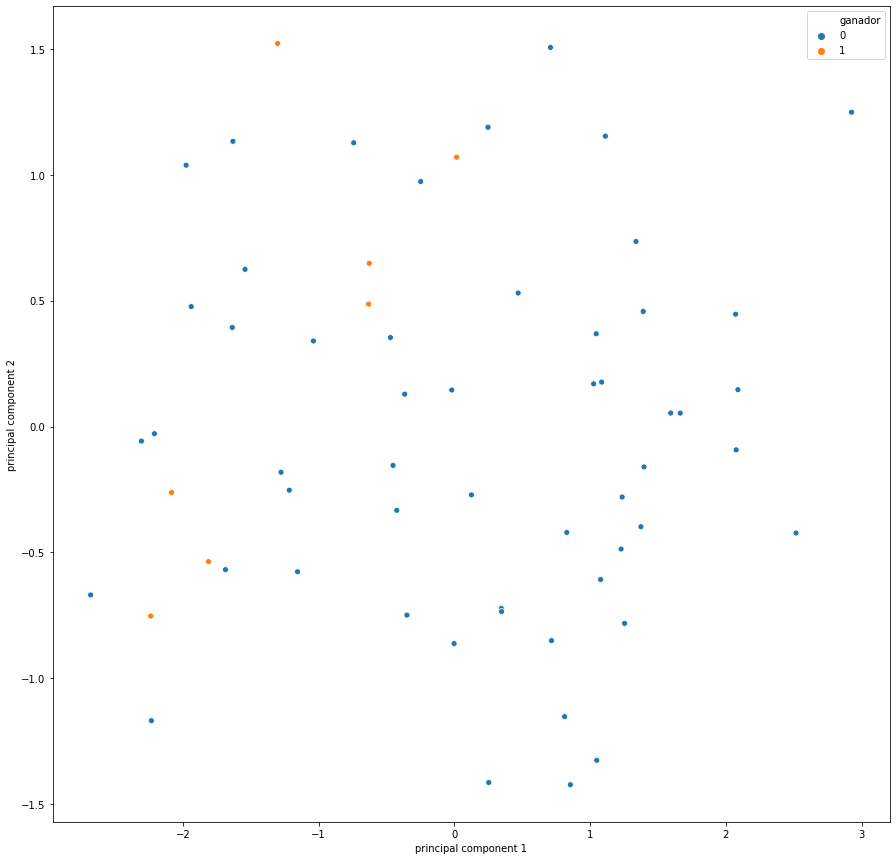

In [210]:
sns.scatterplot(data=principalDf, x='principal component 1', y= 'principal component 2', hue='ganador')

In [209]:
def scatter_text(data, x, y, label, hue, title=None, xlabel=None, ylabel=None):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, hue= hue, size = 8, legend=False)
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[label][line], horizontalalignment='left', 
                 size='medium', color='black', weight='semibold')
    # Set title and axis labels
    #plt.title(title)
    #plt.xlabel(xlabel)
    #plt.ylabel(ylabel)
    return p1

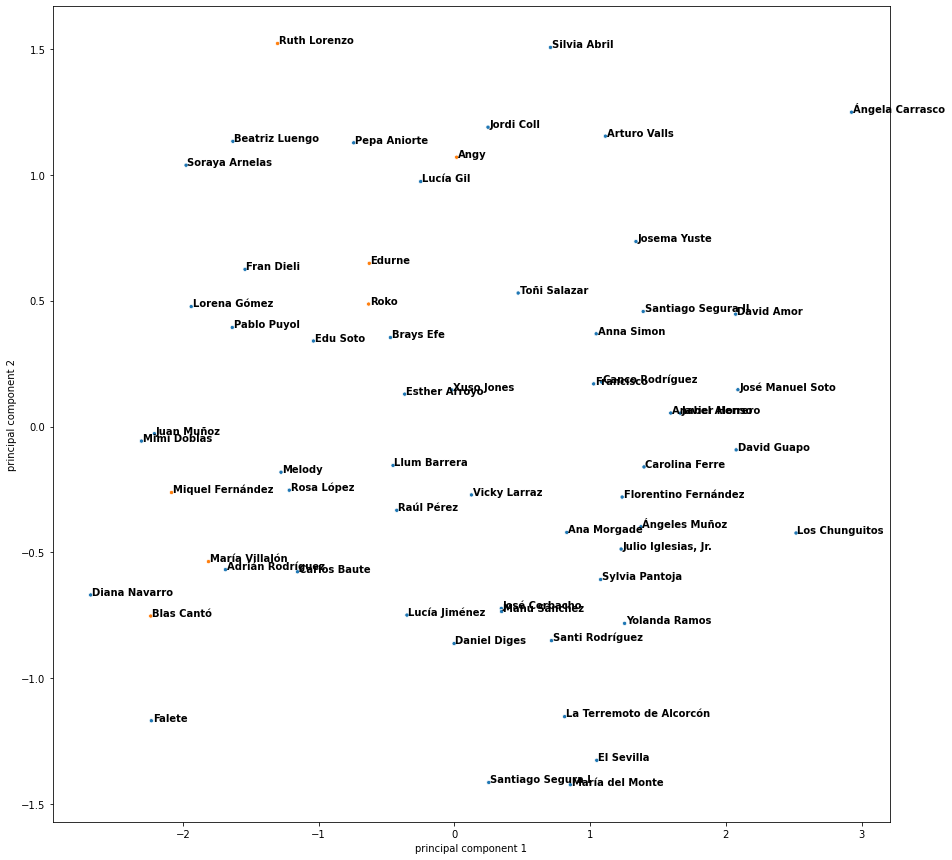

In [211]:
scatter_text(data=principalDf, x='principal component 1', y= 'principal component 2', label='artista', hue='ganador')

In [212]:
from sklearn.metrics import confusion_matrix

In [213]:
confusion_matrix(y_train, model.predict(X_train))

array([[53,  1],
       [ 7,  0]])

In [93]:
X_test = data[data.temporada == 7][[1,2,3]]

In [94]:
len(X_test)

9

In [48]:
y_pred = model.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [96]:
X_test[y_pred == 1]

programa,1,2,3
artista,,,
Soraya Arnelas,11.6,9.6,8.4


In [99]:
data.head()

programa,temporada,ganador,1,2,3
artista,,,,,
Adrián Rodríguez,4,0,8.6,9.2,10.6
Ana Morgade,4,0,5.4,6.4,6.6
Anabel Alonso,7,0,5.0,6.0,4.4
Angy,1,1,9.2,6.4,6.0
Anna Simon,2,0,7.0,4.0,6.4


In [98]:
for temporada in range(1,8):
    X_train = data[data.temporada != temporada][[1,2,3]]
    y_train = data[data.temporada != temporada]['ganador']
    model = LogisticRegression().fit(X_train, y_train)
    print(model.score(X_train, y_train))
    X_test = data[data.temporada == temporada][[1,2,3]]
    y_pred = model.predict(X_test)
    
    display(X_test[y_pred == 1])

0.9032258064516129


programa,1,2,3
artista,,,


0.9032258064516129


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


0.9016393442622951


programa,1,2,3
artista,,,


In [79]:
tcms[tcms.temporada == 8]

,temporada,programa,cancion,artista,j1,j2,j3,j4,publico,bonus,...,titulo,autor,especiales,pais,region,ciudad,sexo,edad,categoria,ganador
955,8,1,Soldi de Mahmood,Jorge González,11,12,12,11,12,NaN,...,Soldi,Mahmood,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
956,8,2,En el último minuto de Miguel Poveda,Jorge González,6,11,10,4,11,NaN,...,En el último minuto,Miguel Poveda,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
957,8,3,Mariana mambo de Chayanne,Jorge González,9,11,10,11,10,NaN,...,Mariana mambo,Chayanne,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
958,8,4,"Relax, Take It Easy de Mika",Jorge González,9,9,8,9,6,NaN,...,"Relax, Take It Easy",Mika,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
959,8,5,No me des guerra de Bambino,Jorge González,10,11,11,10,11,NaN,...,No me des guerra,Bambino,NaN,España,Madrid,Villarejo de Salvanés,M,31,Cantante,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,8,7,Dance Monkey de Tones and I,Belinda Washington,12,12,12,12,12,NaN,...,Dance Monkey,Tones and I,NaN,España,Madrid,Altrincham,F,56,TV,0
1050,8,8,The Shoop Shoop Song (It's in His Kiss) de Che...,Belinda Washington,7,0,8,10,9,NaN,...,The Shoop Shoop Song (It's in His Kiss),Cher (Sorpresa ¡Sorpresa!),Sorpresa,España,Madrid,Altrincham,F,56,TV,0
1051,8,9,Human de Rag'n'Bone Man,Belinda Washington,9,9,8,11,12,NaN,...,Human,Rag'n'Bone Man,NaN,España,Madrid,Altrincham,F,56,TV,0
1052,8,10,Gigi l'amoroso de Dalida,Belinda Washington,6,4,4,4,6,NaN,...,Gigi l'amoroso,Dalida,NaN,España,Madrid,Altrincham,F,56,TV,0
